#### Algorithms those are sensitive in Outliers
1. Linear Regression
2. Logistic Regression
3. K Means Clustering
4. Hierarchical Clustering
5. DBSCAN Clustering
6. PCA - Principal Component Analysis
7. Neural Network

#### Method we should be followed - Clipping and Capping
1. Z score - For Normal Distribution Data
2. IQR - BoxPlot - For Skewed Distribution
3. Percentile - Winsorization Method

In [1]:
#### Import all the libaries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#### Warning Remove
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#### Z - Score Method -- For NORMAL DISTRIBUTION 

In [3]:
#### import the dataset
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

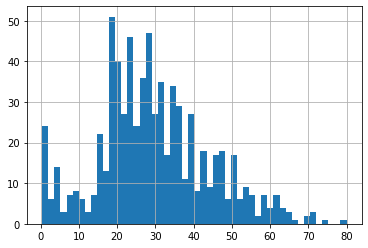

In [4]:
#### take the "Age" column
df.loc[:, 'Age'].hist(bins = 50)
#### It is quite normal distributed data

<AxesSubplot:xlabel='Age', ylabel='Density'>

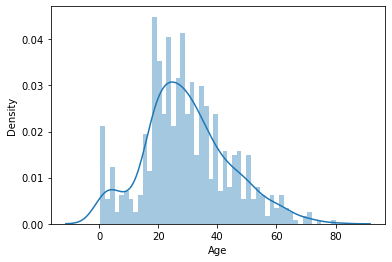

In [5]:
sns.distplot(a = df.loc[:, 'Age'], bins = 50)

In [6]:
#### So we can use Z-Score method in this case
upper_limit_ = df.loc[:, 'Age'].mean() + 3*df.loc[:, 'Age'].std()
lower_limit_ = df.loc[:, 'Age'].mean() - 3*df.loc[:, 'Age'].std()
print("Upper limit is = ", upper_limit_, ' ', "Lower limit is = ", lower_limit_)

Upper limit is =  73.27860964406095   Lower limit is =  -13.88037434994331


In [7]:
##### Check how many rows are in this limit
df.loc[(df.loc[:, 'Age'] >= upper_limit_ ) | (df.loc[:, 'Age'] <= lower_limit_), 'Age'].shape
##### It menas 2 rows are outliers in this particular Z-score

(2,)

<AxesSubplot:xlabel='Age'>

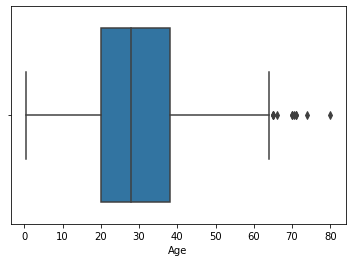

In [8]:
#### Show the distribution
sns.boxplot(df.loc[:, 'Age'])

In [9]:
#### Clipping the outliers
new_df = df[(df.loc[:, 'Age'] <= upper_limit_) & (df.loc[:, 'Age'] >= lower_limit_)]
print("Before clipping the shape is = ", df.shape,'\n')
print("After clipping the shape is  = ", new_df.shape)

Before clipping the shape is =  (891, 12) 

After clipping the shape is  =  (712, 12)


In [10]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Age'>

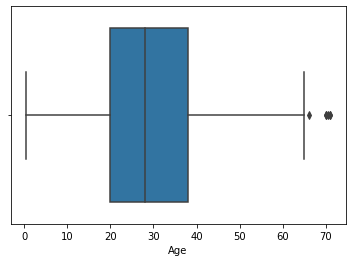

In [11]:
#### Show the boxplot
sns.boxplot(new_df.loc[:, 'Age'])

In [12]:
#### Capping the outliers
df.loc[:, 'Age'] = np.where(df.loc[:, 'Age'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'Age'] < lower_limit_,
                lower_limit_,
                df.loc[:, 'Age']))

print("Before capping the shape is = ", df.shape,'\n')
print("After capping the shape is = ", df.shape,'\n')

Before capping the shape is =  (891, 12) 

After capping the shape is =  (891, 12) 



<AxesSubplot:xlabel='Age'>

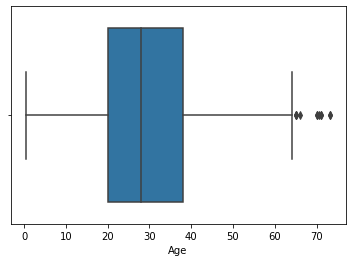

In [13]:
#### Show the distribution
sns.boxplot(df.loc[:, 'Age'])

#### Skewed Distribution Using BoxPlot and IQR

In [14]:
#### import all necessity function
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:>

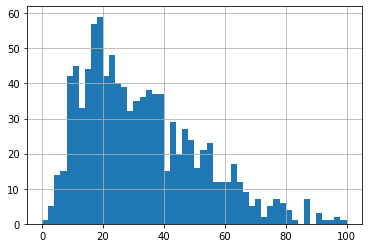

In [15]:
#### plot the histogram 
df.loc[:, 'placement_exam_marks'].hist(bins = 50)
#### it is left skewed distribution

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

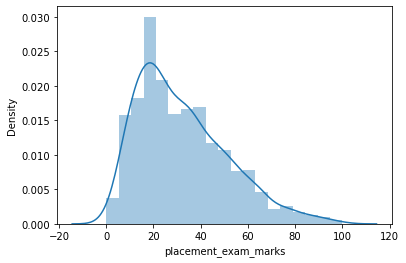

In [16]:
#### plot sns distribution
sns.distplot(df.loc[:, 'placement_exam_marks'])

<AxesSubplot:xlabel='placement_exam_marks'>

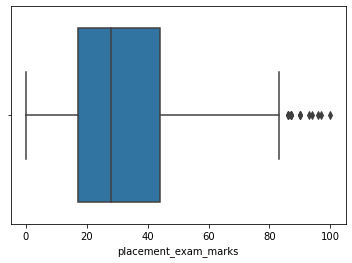

In [17]:
#### show the outliers
sns.boxplot(df.loc[:, 'placement_exam_marks'])

In [18]:
#### calculate the 75% and 25%
percentile_75 = df.loc[:, 'placement_exam_marks'].quantile(0.75)
percentile_25 = df.loc[:, 'placement_exam_marks'].quantile(0.25)
print("75% quantile is = {} and 25% quantile is = {}".format(percentile_75, percentile_25))

75% quantile is = 44.0 and 25% quantile is = 17.0


In [19]:
#### calculate IQR
IQR_ = (percentile_75 - percentile_25)
print("The IQR is = ", IQR_)

The IQR is =  27.0


In [20]:
#### calculate the upper and lower limit
upper_limit_ = percentile_75 + 1.5*IQR_
lower_limit_ = percentile_25 - 1.5*IQR_
print("upper limit is = {} and lower limit is = {}".format(upper_limit_, lower_limit_))

upper limit is = 84.5 and lower limit is = -23.5


In [21]:
#### show how many outliers are presence in the dataset
df[(df.loc[:, 'placement_exam_marks'] >= upper_limit_) | (df.loc[:, 'placement_exam_marks'] <= lower_limit_)].shape

(15, 3)

In [22]:
#### Clipping the outliers from the dataset
new_df = df[(df.loc[:, 'placement_exam_marks'] < upper_limit_) & (df.loc[:, 'placement_exam_marks'] > lower_limit_)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:xlabel='placement_exam_marks'>

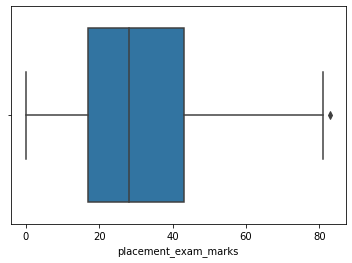

In [23]:
#### show the outliers
sns.boxplot(new_df.loc[:, 'placement_exam_marks'])
#### Outlier is removed

In [24]:
#### Capping the outliers
df.loc[:, 'placement_exam_marks'] = np.where(df.loc[:, 'placement_exam_marks'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'placement_exam_marks'] < lower_limit_,
                lower_limit_,
                df.loc[:, 'placement_exam_marks']))
print("Capping is done in left skewed dataset")

Capping is done in left skewed dataset


<AxesSubplot:xlabel='placement_exam_marks'>

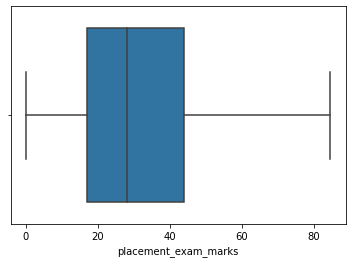

In [25]:
#### plot the boxplot
sns.boxplot(df.loc[:, 'placement_exam_marks'])
#### outlier is removed

#### Percentile - Winsorization Method

In [26]:
#### import the dataset
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:>

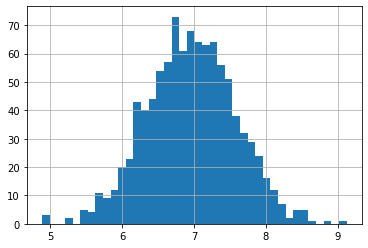

In [27]:
#### Show the distribution 
df.loc[:, 'cgpa'].hist(bins = 40)
#### it is normal distributed data

<AxesSubplot:xlabel='cgpa'>

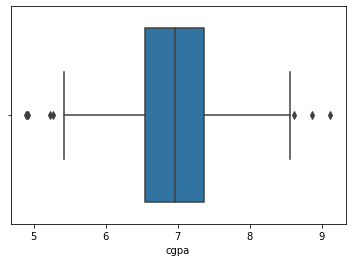

In [28]:
#### Boxplot
sns.boxplot(df.loc[:, 'cgpa'])

In [29]:
upper_limit_ = df.loc[:, 'cgpa'].quantile(0.975)
lower_limit_ = df.loc[:, 'cgpa'].quantile(1 - 0.975)
print("upper limit is = {} and lower limit is = {}".format(upper_limit_, lower_limit_))

upper limit is = 8.13025 and lower limit is = 5.739750000000001


In [30]:
#### Clipping the dataset
df[(df.loc[:, 'cgpa'] >= upper_limit_) | (df.loc[:, 'cgpa'] <= lower_limit_)].shape

(50, 3)

In [31]:
#### new dataset
new_df = df[(df.loc[:, 'cgpa'] < upper_limit_) & (df.loc[:, 'cgpa'] > lower_limit_)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<AxesSubplot:xlabel='cgpa'>

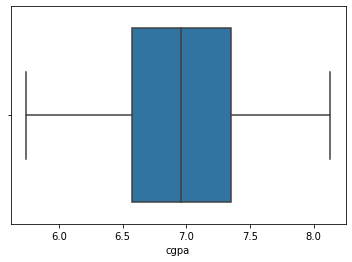

In [32]:
#### show boxplot 
sns.boxplot(new_df.loc[:, 'cgpa'])

In [33]:
#### Capping 
df.loc[:, 'cgpa'] = np.where(df.loc[:, 'cgpa'] > upper_limit_,
        upper_limit_,
        np.where(df.loc[:, 'cgpa'] < lower_limit_,
                lower_limit_,
                df.loc[:, 'cgpa']))

print("Capping is done.")

Capping is done.


<AxesSubplot:xlabel='cgpa'>

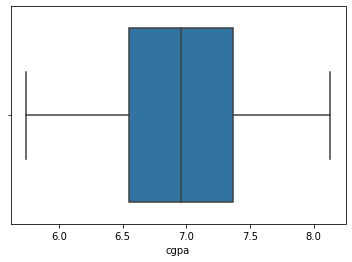

In [34]:
sns.boxplot(df.loc[:, 'cgpa'])